# Room 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

In [3]:
df = pd.read_csv('NSMES1988.csv', index_col=0)
df.head()

,visits,nvisits,ovisits,novisits,emergency,hospital,health,chronic,adl,region,age,gender,married,school,income,employed,insurance,medicaid
1,5,0,0,0,0,1,average,2,normal,other,6.9,male,yes,6,2.8810,yes,yes,no
2,1,0,2,0,2,0,average,2,normal,other,7.4,female,yes,10,2.7478,no,yes,no
3,13,0,0,0,3,3,poor,4,limited,other,6.6,female,no,10,0.6532,no,no,yes
4,16,0,5,0,1,1,poor,2,limited,other,7.6,male,yes,3,0.6588,no,yes,no
5,3,0,0,0,0,0,average,2,limited,other,7.9,female,yes,6,0.6588,no,yes,no


Convert age and income to their proper values based on the data dictionary

In [4]:
df["age"] = df["age"] * 10
df["income"] = df["income"] * 10000

df.head()

,visits,nvisits,ovisits,novisits,emergency,hospital,health,chronic,adl,region,age,gender,married,school,income,employed,insurance,medicaid
1,5,0,0,0,0,1,average,2,normal,other,69.0,male,yes,6,28810.0,yes,yes,no
2,1,0,2,0,2,0,average,2,normal,other,74.0,female,yes,10,27478.0,no,yes,no
3,13,0,0,0,3,3,poor,4,limited,other,66.0,female,no,10,6532.0,no,no,yes
4,16,0,5,0,1,1,poor,2,limited,other,76.0,male,yes,3,6588.0,no,yes,no
5,3,0,0,0,0,0,average,2,limited,other,79.0,female,yes,6,6588.0,no,yes,no


Identify different data types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4406 entries, 1 to 4406
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   visits     4406 non-null   int64  
 1   nvisits    4406 non-null   int64  
 2   ovisits    4406 non-null   int64  
 3   novisits   4406 non-null   int64  
 4   emergency  4406 non-null   int64  
 5   hospital   4406 non-null   int64  
 6   health     4406 non-null   object 
 7   chronic    4406 non-null   int64  
 8   adl        4406 non-null   object 
 9   region     4406 non-null   object 
 10  age        4406 non-null   float64
 11  gender     4406 non-null   object 
 12  married    4406 non-null   object 
 13  school     4406 non-null   int64  
 14  income     4406 non-null   float64
 15  employed   4406 non-null   object 
 16  insurance  4406 non-null   object 
 17  medicaid   4406 non-null   object 
dtypes: float64(2), int64(8), object(8)
memory usage: 654.0+ KB


Identify Categorical types in the data

In [6]:
categorical_features = df.select_dtypes(include="object").columns 
categorical_features

Index(['health', 'adl', 'region', 'gender', 'married', 'employed', 'insurance',
       'medicaid'],
      dtype='object')

In [7]:
numerical_features = df.select_dtypes(include=np.number).columns
numerical_features

Index(['visits', 'nvisits', 'ovisits', 'novisits', 'emergency', 'hospital',
       'chronic', 'age', 'school', 'income'],
      dtype='object')

Get basic statistical measures for the numerical columns in the dataset

In [8]:
df.describe()

,visits,nvisits,ovisits,novisits,emergency,hospital,chronic,age,school,income
count,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000
mean,5.774399,1.618021,0.750794,0.536087,0.263504,0.295960,1.541988,74.024058,10.290286,25271.320468
std,6.759225,5.317056,3.652759,3.879506,0.703659,0.746398,1.349632,6.334050,3.738736,29246.476178
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66.000000,0.000000,-10125.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,69.000000,8.000000,9121.500000
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,73.000000,11.000000,16981.500000
75%,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,78.000000,12.000000,31728.500000
max,89.000000,104.000000,141.000000,155.000000,12.000000,8.000000,8.000000,109.000000,18.000000,548351.000000


**Observations**
- Negative values in the income column (data entry error?)
- Age range of patients observed is between 66 and 109 years

### Non-graphical analysis using data aggregation

What is the total number of hospital stays for different employment statuses?

In [9]:
df.columns

Index(['visits', 'nvisits', 'ovisits', 'novisits', 'emergency', 'hospital',
       'health', 'chronic', 'adl', 'region', 'age', 'gender', 'married',
       'school', 'income', 'employed', 'insurance', 'medicaid'],
      dtype='object')

In [13]:
df.groupby(["employed"])["hospital"].sum()

employed
no     1201
yes     103
Name: hospital, dtype: int64

There are more hospital stays for people who are unemployed

Build a pivot table that shows all numerical measures with health column as an index

In [31]:
numerical_pivot_table = df.pivot_table(index='health', values=numerical_features, aggfunc=['mean'])
numerical_pivot_table

mean                                                        \
                 age   chronic emergency  hospital        income  novisits   
health                                                                       
average    73.849245  1.430892  0.223425  0.252779  25519.896449  0.548589   
excellent  73.102041  0.749271  0.096210  0.099125  32774.114577  0.163265   
poor       75.702166  2.736462  0.620939  0.691336  19051.624621  0.687726   

                                                    
            nvisits   ovisits     school    visits  
health                                              
average    1.652323  0.691650  10.426617  5.510687  
excellent  1.588921  0.341108  11.329446  3.428571  
poor       1.418773  1.379061   8.783394  8.897112

On average, people with poor health have more chronic conditions, more hospital visits and lower income.

What is the median number of emergency room visits for each region and gender combination?

In [32]:
df["emergency"].value_counts()

emergency
0     3602
1      588
2      137
3       54
4       11
5        7
6        2
8        2
11       1
12       1
7        1
Name: count, dtype: int64

In [18]:
df.groupby(["region", "gender"])["emergency"].median()

region     gender
midwest    female    0.0
           male      0.0
northeast  female    0.0
           male      0.0
other      female    0.0
           male      0.0
west       female    0.0
           male      0.0
Name: emergency, dtype: float64

The median value for all combinations of emergency visits by region and gender is 0. Less than 25% of the population made visits to the emergency room.

Get the number of individuals covered by Medicaid and its effect on the number of hospital stays

In [40]:
medicaid_df = df[(df["medicaid"] == "yes") & (df["hospital"] > 0)]
medicaid_df["hospital"].count()

np.int64(105)

In [84]:
df.groupby(["medicaid"])["hospital"].count()

medicaid
no     4004
yes     402
Name: hospital, dtype: int64

In [85]:
105/402

0.26119402985074625

About 26% of patients with Medicaid have hospital stays.

### Visualize and Analyze data

- Choose proper plot size to demonstrate data points clearly
- Add plot and axis titles
- Use bmh or ggplot matplotlib style (hint: plt.style.use(‘ggplot'))

In [23]:
plt.style.use('ggplot')

Build a histogram for every numerical column using subplots and report the columns that have a
lot of outliers

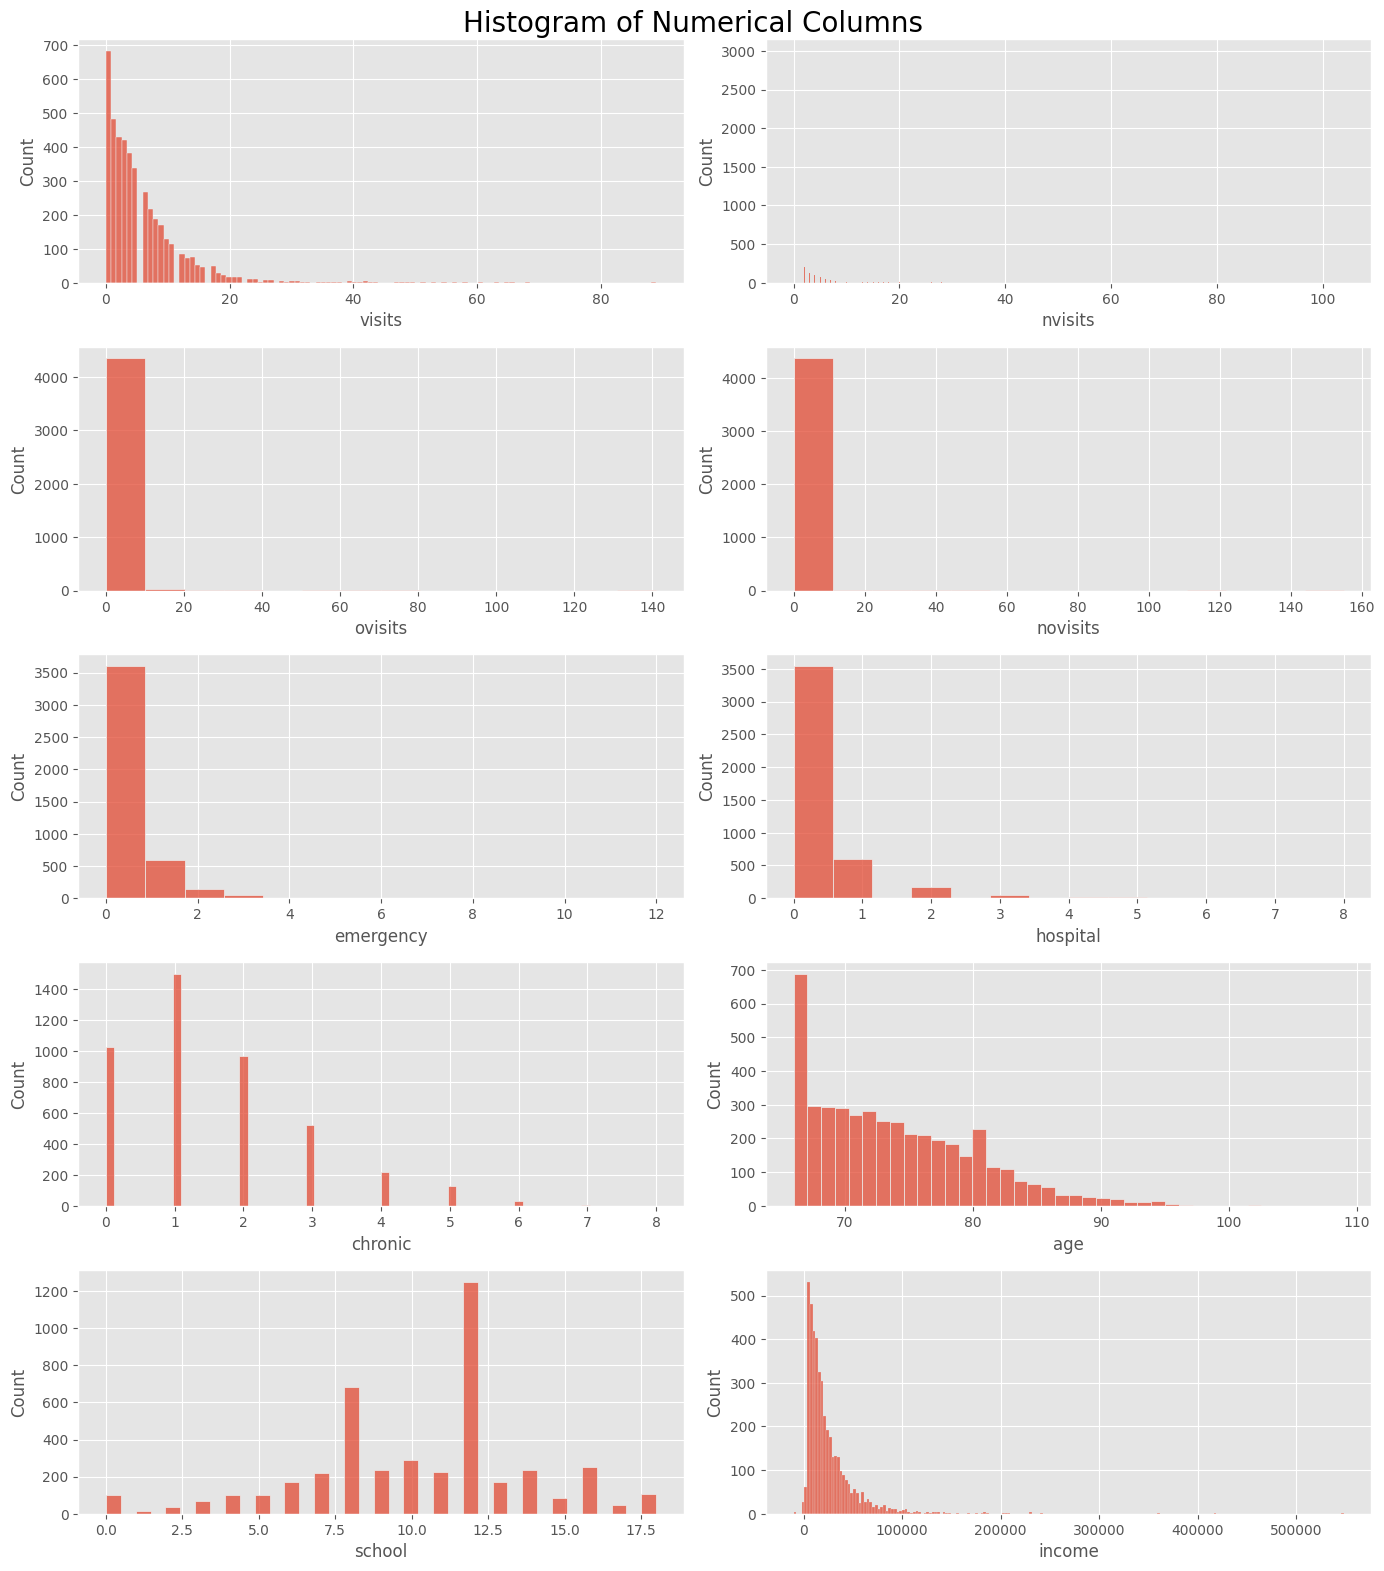

In [29]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14,16))

#flatten the axes so we can have a series from 0 to 3 instead of [0,0] for example
axes = axes.flatten()

#loop through each column name and plot it
for idx, col in enumerate(numerical_features):
    sns.histplot(data=df, x=col, ax=axes[idx])

fig.suptitle('Histogram of Numerical Columns', fontsize=20)
fig.tight_layout(pad=1.2, w_pad=1)

Some columns with outliers:
- visits
- income

Perform box and whisker analysis based on the following categories:
- Different types of visits
- Gender
- Marital Status
- Employment Status

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14,16))

#flatten the axes so we can have a series from 0 to 3 instead of [0,0] for example
axes = axes.flatten()

#loop through each column name and plot it
for idx, col in enumerate([]):
    sns.boxplot(data=df, x=col, ax=axes[idx])

fig.suptitle('Boxplots of Visits Columns', fontsize=20)
fig.tight_layout(pad=1.2, w_pad=1)

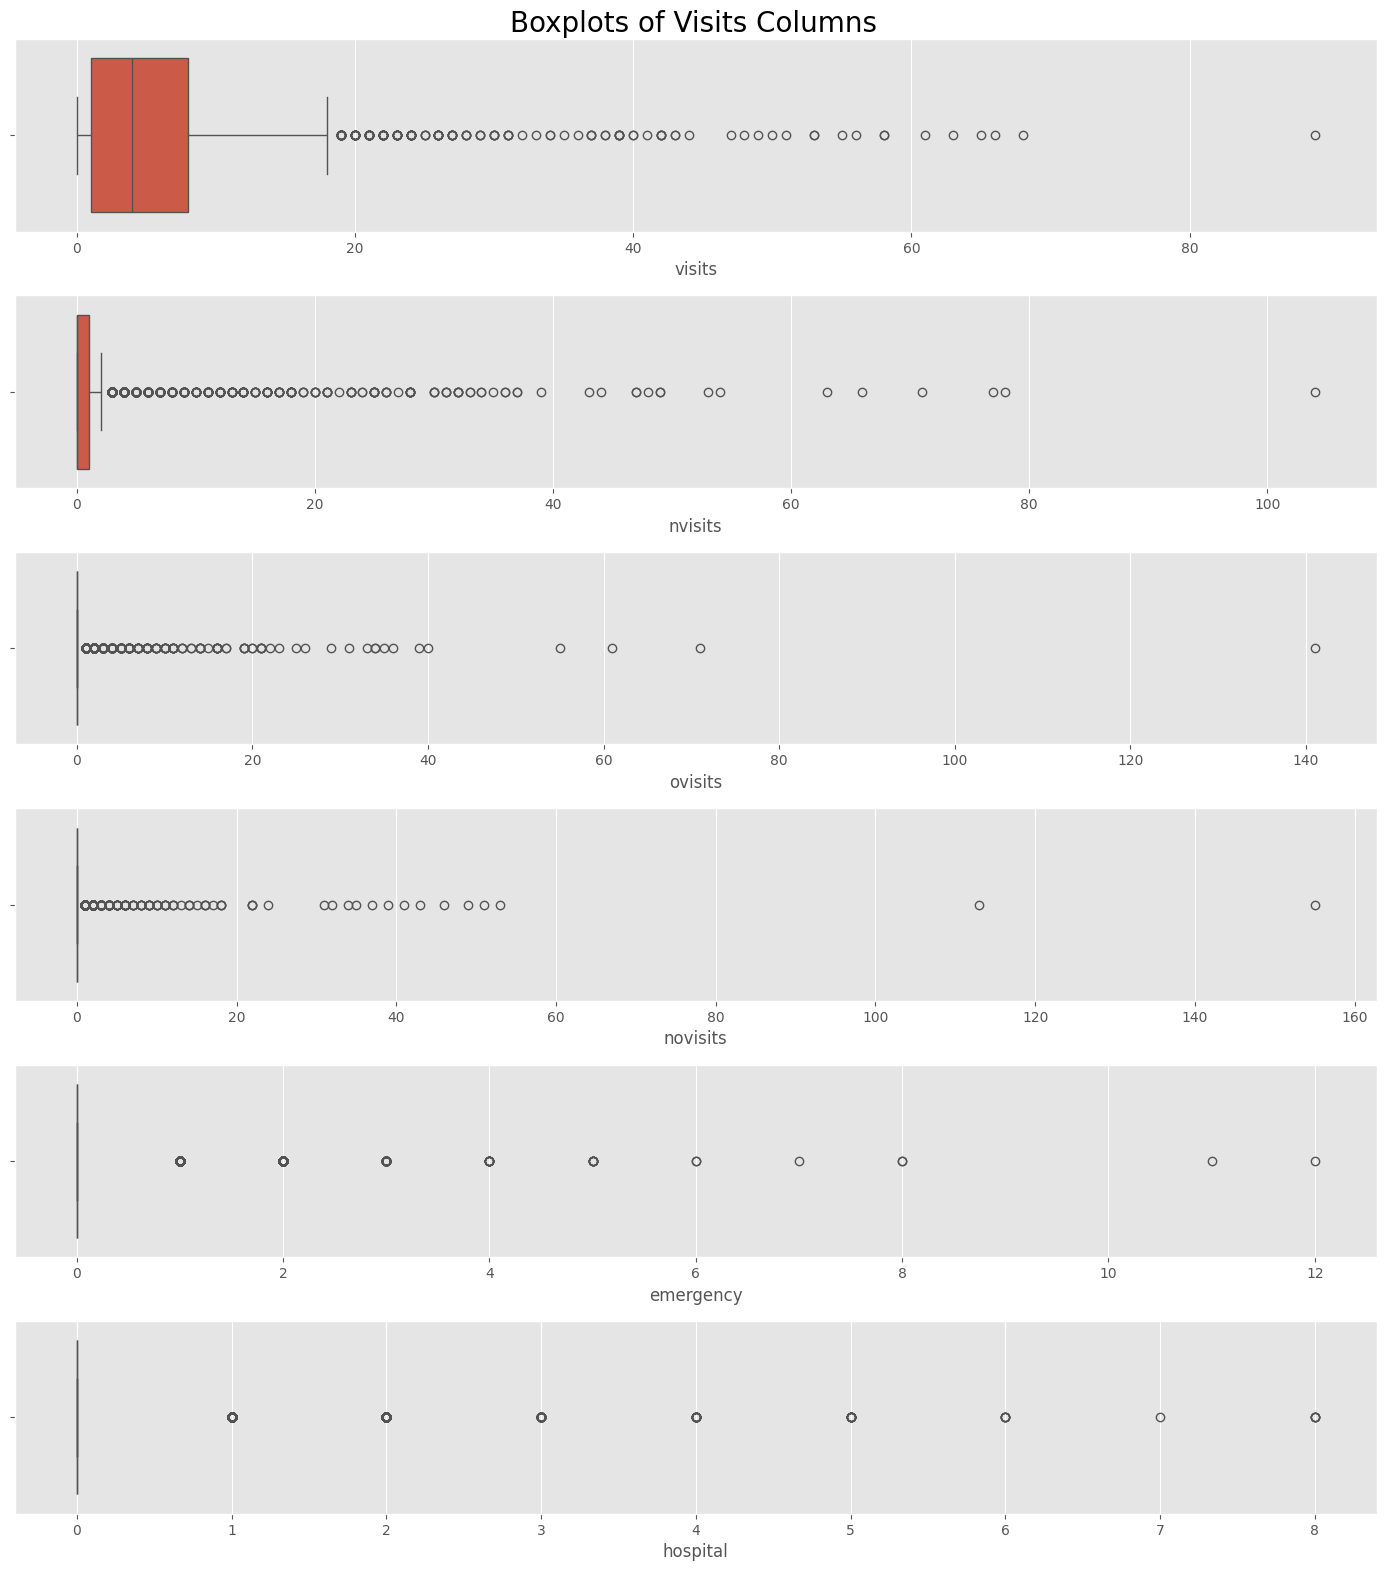

In [44]:
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(14,16))

#flatten the axes so we can have a series from 0 to 3 instead of [0,0] for example
axes = axes.flatten()

#loop through each column name and plot it
for idx, col in enumerate(['visits', 'nvisits', 'ovisits', 'novisits', 'emergency', 'hospital']):
    sns.boxplot(data=df, x=col, ax=axes[idx])

fig.suptitle('Boxplots of Visits Columns', fontsize=20)
fig.tight_layout(pad=1.2, w_pad=1)

The visits columns have a lot of outliers. Further analysis can be done after removing the outliers.

<Axes: title={'center': 'Number of physician office visits by Gender'}, xlabel='gender', ylabel='visits'>

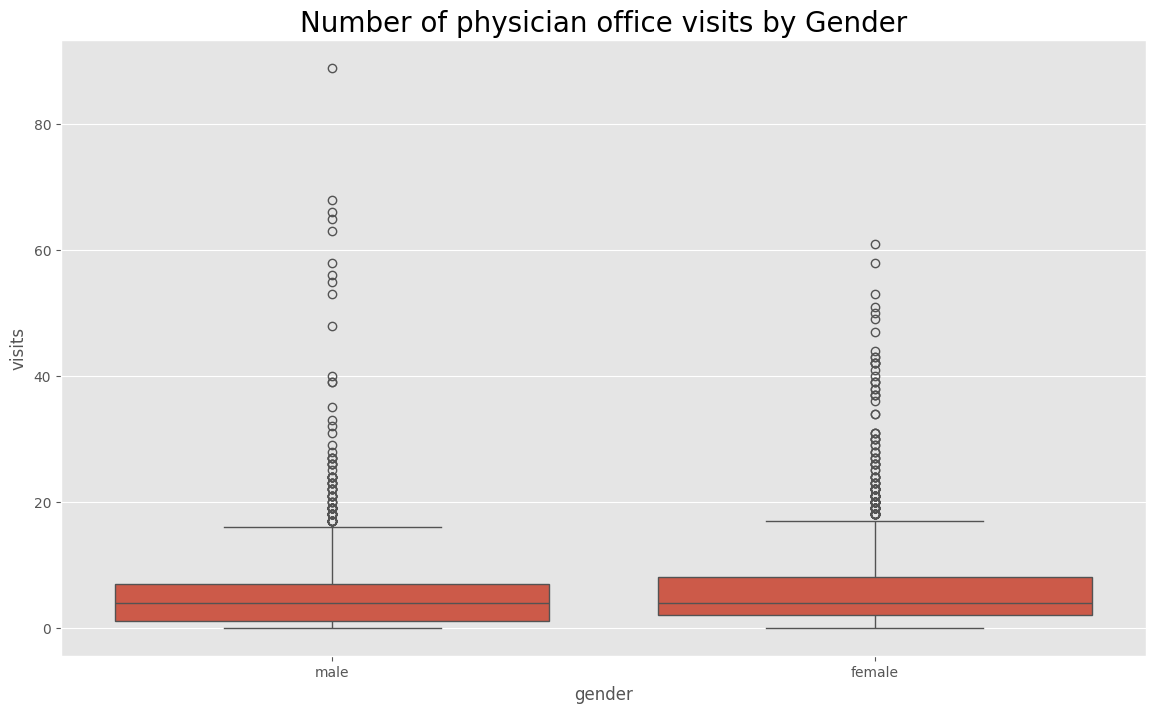

In [88]:
plt.figure(figsize=(14,8))
plt.title('Number of physician office visits by Gender', fontsize=20)

sns.boxplot(x=df['gender'], y=df['visits'])

Visits by gender have similar distributions. However, there are more outliers among males.

<Axes: title={'center': 'Number of physician office visits by Marital Status'}, xlabel='married', ylabel='visits'>

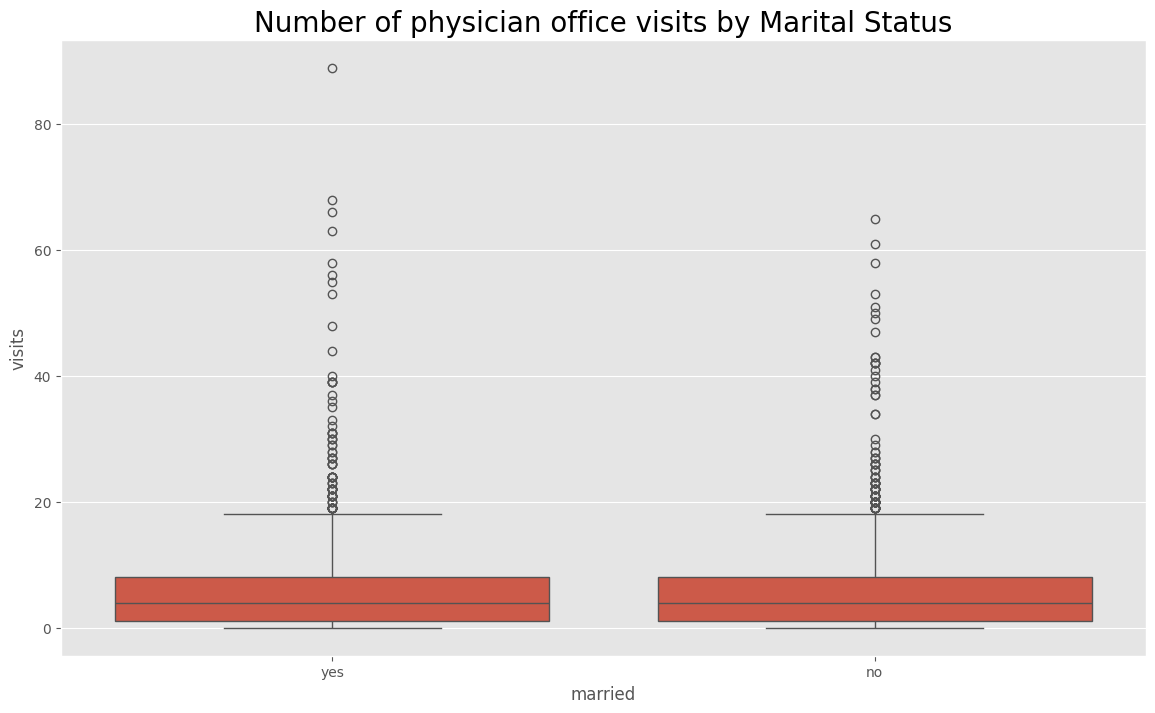

In [89]:
plt.figure(figsize=(14,8))
plt.title('Number of physician office visits by Marital Status', fontsize=20)

sns.boxplot(x=df['married'], y=df['visits'])

Visits by marital status have similar distributions. 

<Axes: title={'center': 'Number of physician office visits by Employment Status'}, xlabel='employed', ylabel='visits'>

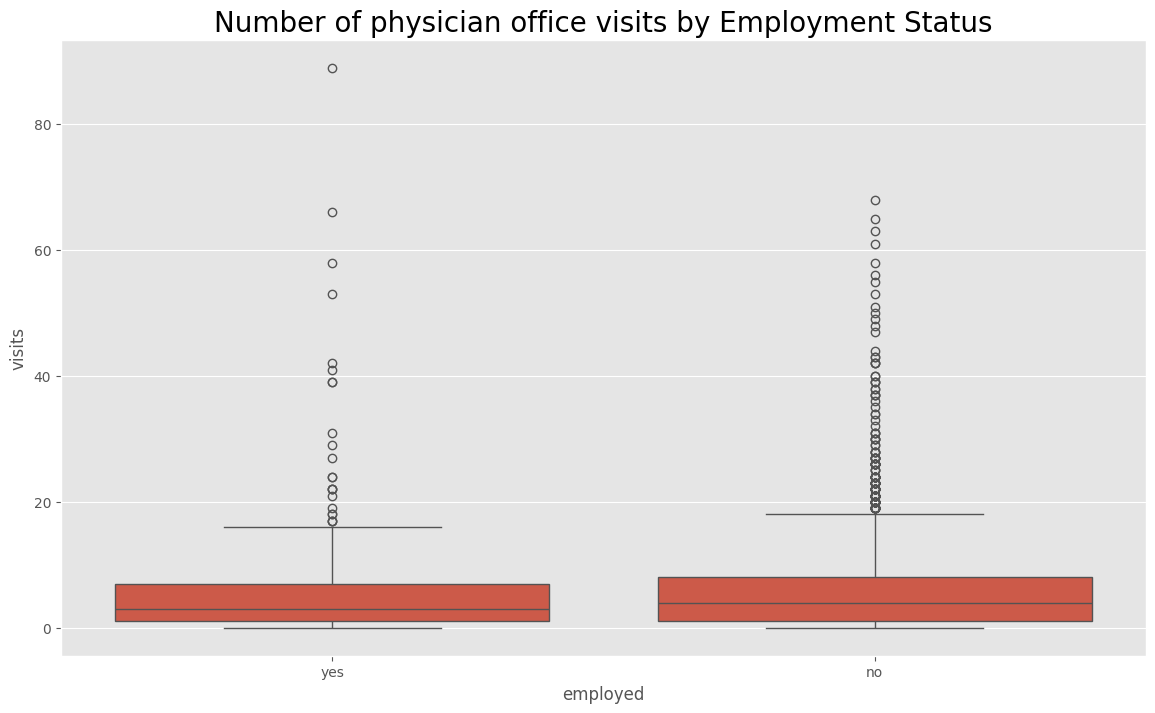

In [90]:
plt.figure(figsize=(14,8))
plt.title('Number of physician office visits by Employment Status', fontsize=20)

sns.boxplot(x=df['employed'], y=df['visits'])

Visits by employment status have similar distributions. 

Generate a plot to view the number of individuals within each age group, separated by gender.

<Axes: title={'center': 'Histogram of number of people within each age group, separated by gender'}, xlabel='age', ylabel='Count'>

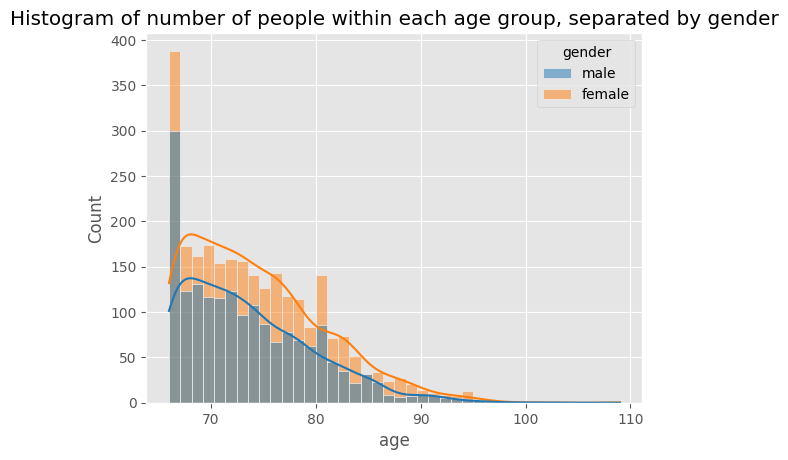

In [59]:
plt.title("Histogram of number of people within each age group, separated by gender")
sns.histplot(data=df, x='age', hue='gender', kde=True, palette='tab10')

For every age group, there are more female patients than male. Both distributions have a similar shape

Build a plot to check if there’s a relationship between Age and number of physician’s office visits.

In [71]:
correlation_matrix = df[numerical_features].corr()
correlation_matrix

,visits,nvisits,ovisits,novisits,emergency,hospital,chronic,age,school,income
visits,1.000000,0.226365,0.068144,0.078468,0.158748,0.240789,0.261886,0.003404,0.064433,-0.004951
nvisits,0.226365,1.000000,0.001129,0.041768,0.049056,0.050401,0.037113,-0.041640,0.085974,0.010731
ovisits,0.068144,0.001129,1.000000,0.466923,0.065388,0.110573,0.100805,-0.040028,-0.012156,-0.004267
novisits,0.078468,0.041768,0.466923,1.000000,0.024083,0.065301,0.040748,-0.032813,-0.011733,-0.007786
emergency,0.158748,0.049056,0.065388,0.024083,1.000000,0.476061,0.203845,0.061023,-0.071192,-0.026462
hospital,0.240789,0.050401,0.110573,0.065301,0.476061,1.000000,0.233524,0.074122,-0.036082,-0.014183
chronic,0.261886,0.037113,0.100805,0.040748,0.203845,0.233524,1.000000,0.099758,-0.065829,-0.047397
age,0.003404,-0.041640,-0.040028,-0.032813,0.061023,0.074122,0.099758,1.000000,-0.142996,-0.073130
school,0.064433,0.085974,-0.012156,-0.011733,-0.071192,-0.036082,-0.065829,-0.142996,1.000000,0.259199
income,-0.004951,0.010731,-0.004267,-0.007786,-0.026462,-0.014183,-0.047397,-0.073130,0.259199,1.000000


<Axes: >

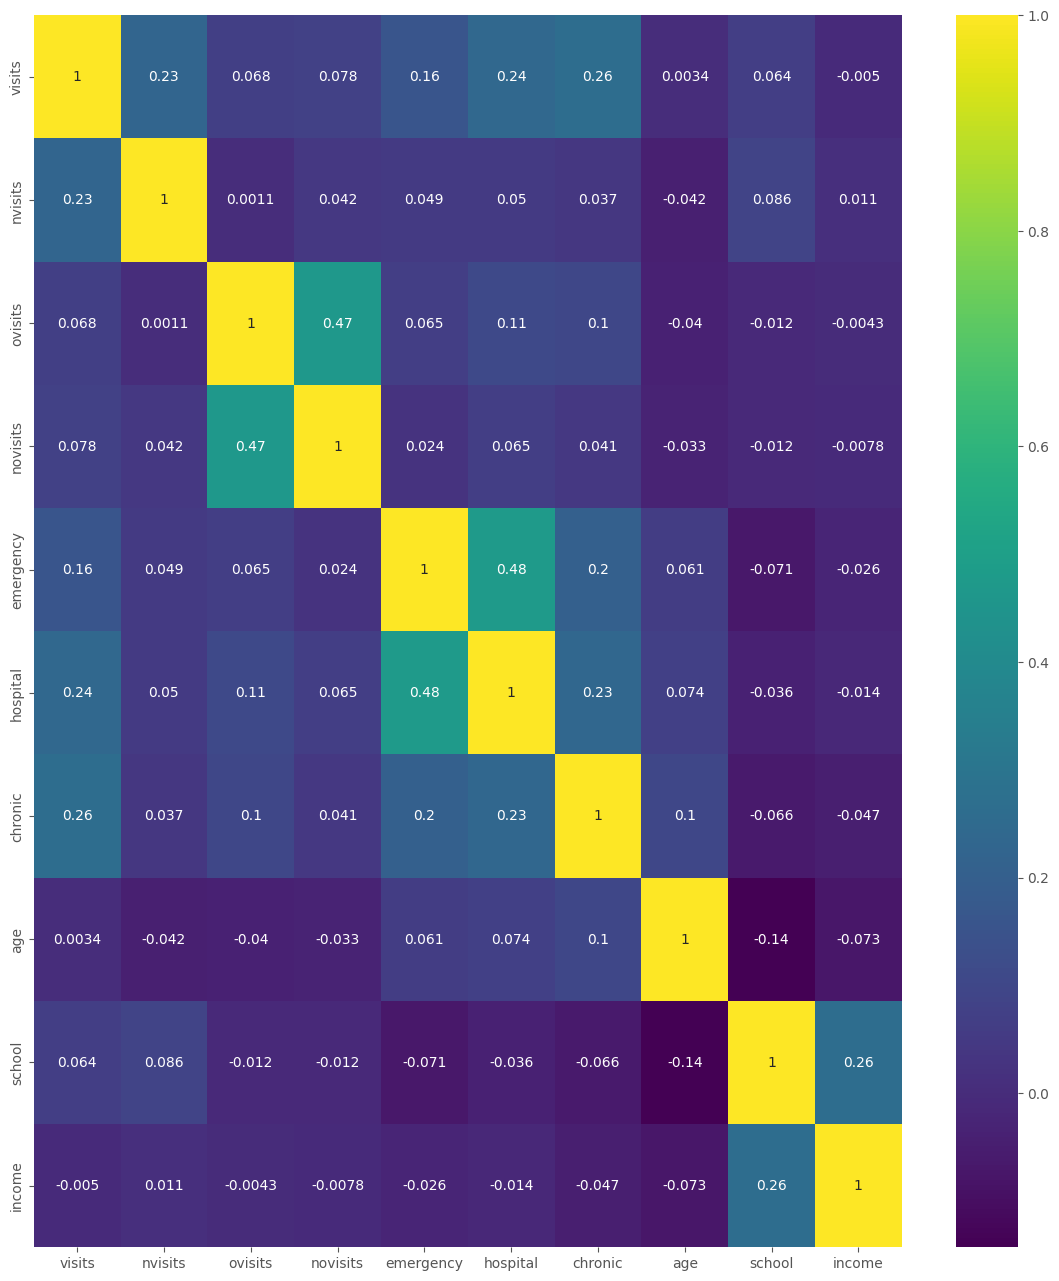

In [73]:
plt.figure(figsize=(14,16))
sns.heatmap(correlation_matrix, cmap='viridis', annot=True)

The numerical features generally have low correlation

<Axes: title={'center': 'Regression plot of visits and age'}, xlabel='age', ylabel='visits'>

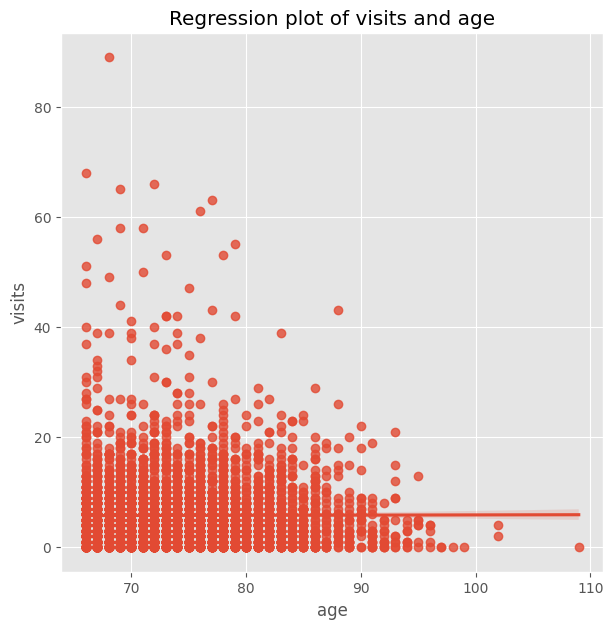

In [68]:
plt.figure(figsize=(7,7))
plt.title("Regression plot of visits and age")
sns.regplot(data=df, x='age', y='visits')

There seems to be a very low relationship between age and number of physician visits, but dispersion tends to reduce with higher age.

Check the correlation between having chronic conditions and emergency room visits

<Axes: title={'center': 'Regression plot of chronic conditions and emergency room visits'}, xlabel='chronic', ylabel='emergency'>

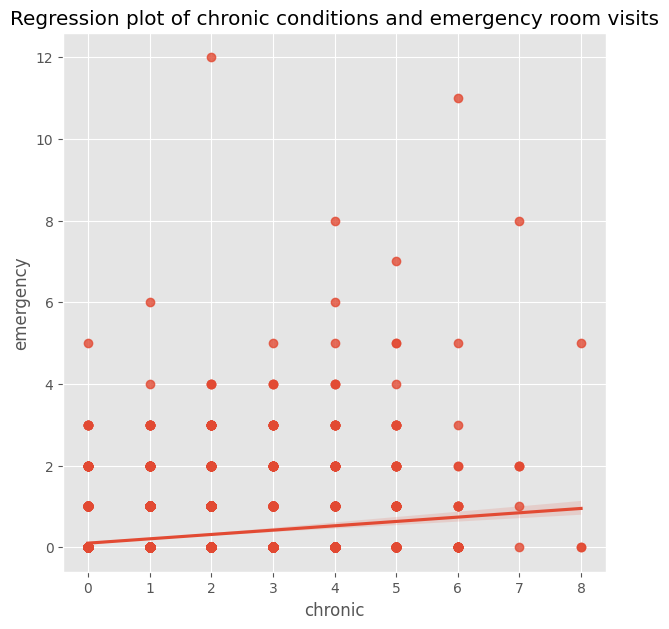

In [69]:
plt.figure(figsize=(7,7))
plt.title("Regression plot of chronic conditions and emergency room visits")
sns.regplot(data=df, x='chronic', y='emergency')

There is a small positive correlation between having chronic conditions and emergency room visits

Regional Income Distribution: build a violin plot to display the income distribution across various
regions.

<Axes: title={'center': 'Violin plot showing the income distribution across regions'}, xlabel='region', ylabel='income'>

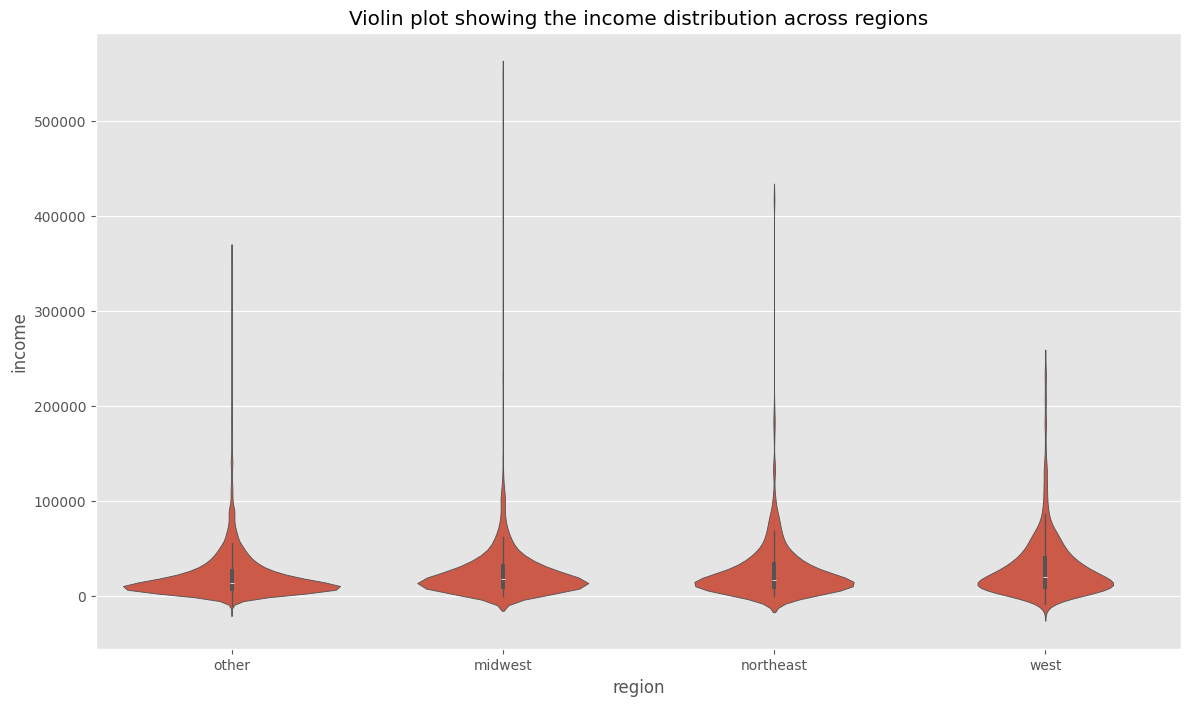

In [76]:
plt.figure(figsize=(14,8))
plt.title("Violin plot showing the income distribution across regions")
sns.violinplot(data=df, x='region', y='income')

All the regions have similar medians, but there are more outliers in the midwest than any other region.

In [77]:
correlation_matrix

,visits,nvisits,ovisits,novisits,emergency,hospital,chronic,age,school,income
visits,1.000000,0.226365,0.068144,0.078468,0.158748,0.240789,0.261886,0.003404,0.064433,-0.004951
nvisits,0.226365,1.000000,0.001129,0.041768,0.049056,0.050401,0.037113,-0.041640,0.085974,0.010731
ovisits,0.068144,0.001129,1.000000,0.466923,0.065388,0.110573,0.100805,-0.040028,-0.012156,-0.004267
novisits,0.078468,0.041768,0.466923,1.000000,0.024083,0.065301,0.040748,-0.032813,-0.011733,-0.007786
emergency,0.158748,0.049056,0.065388,0.024083,1.000000,0.476061,0.203845,0.061023,-0.071192,-0.026462
hospital,0.240789,0.050401,0.110573,0.065301,0.476061,1.000000,0.233524,0.074122,-0.036082,-0.014183
chronic,0.261886,0.037113,0.100805,0.040748,0.203845,0.233524,1.000000,0.099758,-0.065829,-0.047397
age,0.003404,-0.041640,-0.040028,-0.032813,0.061023,0.074122,0.099758,1.000000,-0.142996,-0.073130
school,0.064433,0.085974,-0.012156,-0.011733,-0.071192,-0.036082,-0.065829,-0.142996,1.000000,0.259199
income,-0.004951,0.010731,-0.004267,-0.007786,-0.026462,-0.014183,-0.047397,-0.073130,0.259199,1.000000


In [78]:
correlation_matrix["emergency"]

visits       0.158748
nvisits      0.049056
ovisits      0.065388
novisits     0.024083
emergency    1.000000
hospital     0.476061
chronic      0.203845
age          0.061023
school      -0.071192
income      -0.026462
Name: emergency, dtype: float64

In [80]:
#define the threshold
threshold = .1
corr_emergency = correlation_matrix['emergency']
#get the values that are higher than .1
high_corr_cols = corr_emergency[abs(corr_emergency)>threshold].index
high_corr_cols

Index(['visits', 'emergency', 'hospital', 'chronic'], dtype='object')

<Axes: >

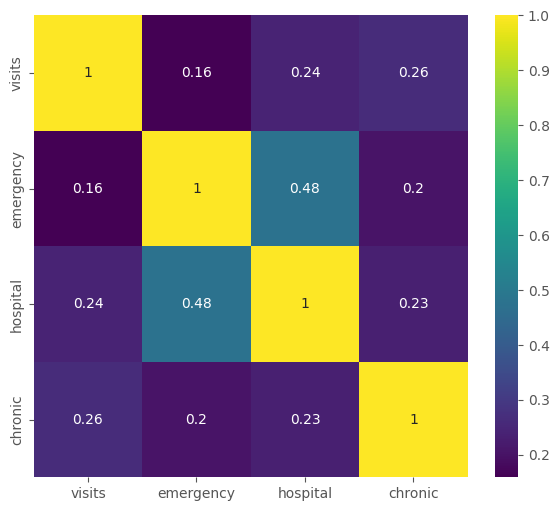

In [81]:
high_corr_cols_matrix = df[high_corr_cols].corr()

plt.figure(figsize=(7,6))
sns.heatmap(high_corr_cols_matrix, cmap='viridis', annot=True)

No columns are highly correlated with emergency room visits (above the 0.55 threshold), however, hospital visits (0.47) and number of chronic conditions (0.20) have the strongest relationship with emergency room visits.

Build a scatterplot to analyze the relationship between age and income with categorical factors of
your choice. Hint: use size, hue, and style

<Axes: title={'center': 'Relationship between age and income with gender, region and medicaid'}, xlabel='age', ylabel='income'>

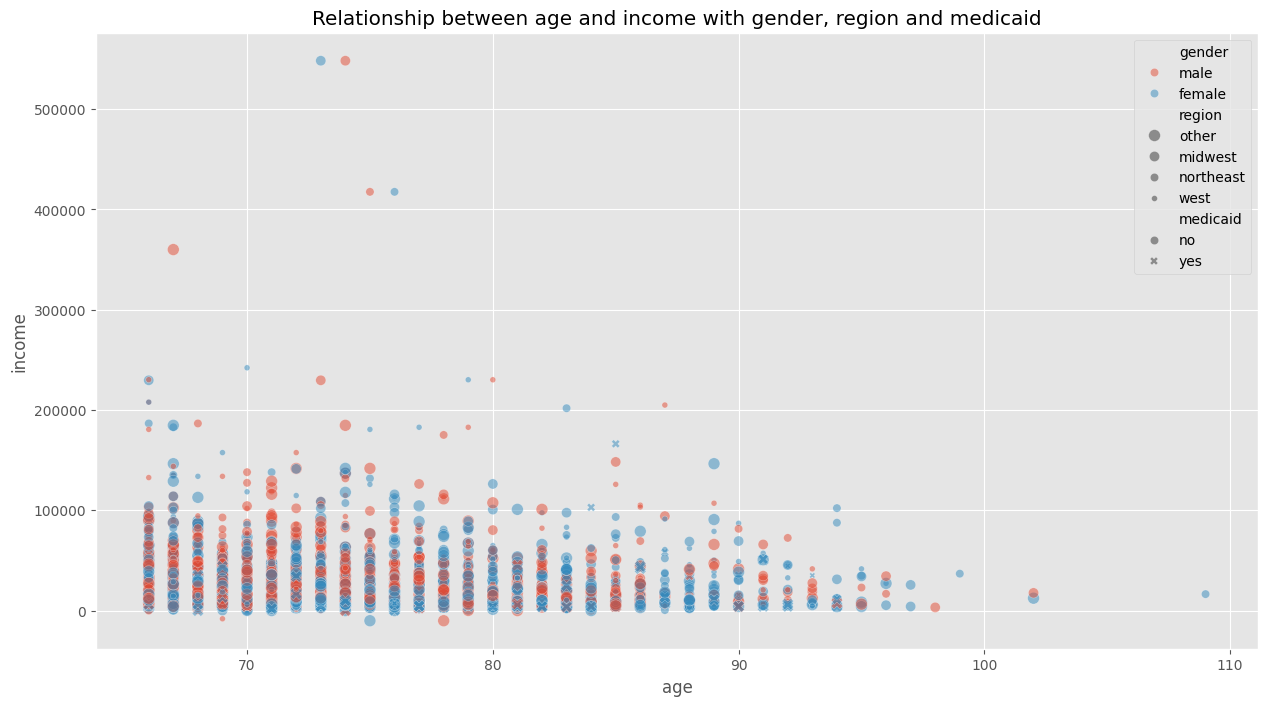

In [91]:
plt.figure(figsize=(15,8))
plt.title("Relationship between age and income with gender, region and medicaid")
sns.scatterplot(data=df,x='age',y='income',hue='gender',size='region', style='medicaid', alpha=0.5)

**Observations**
- There are more records with no medicaid
- The majority of the patients have income < 200,000